# Agents
- In LangChain, agents are systems that autonomously decide how to use tools to accomplish a task. They take an input, analyze it, and choose the right tool(s) to solve the problem.
- Types of Agents in LangChain:
- from langchain.agents import AgentType

# Zero-shot Agent:

- Does not rely on prior training or a pre-defined plan.
  Decides what to do based on the current input alone.
- ZERO_SHOT_REACT_DESCRIPTION is a type of agent that performs a reasoning step before taking action. It does not rely on any chat history, meaning it makes decisions based solely on the current input. This makes it suitable for scenarios where an immediate response is required without the need for context from previous interactions.


In [84]:
#Defining Custom Tools

from langchain.agents import tool


@tool
def multiply(first_int,second_int=0) -> float:
    """Calculates Multiplication two numbers together
       Given a positive number first_int and second_int
       Multiply both the numbers with below opeator and give the result
    """
    return  first_int*second_int
@tool
def sqrt(number: float) -> float:
    """Calculates the square root of a number
       Given one positve number do the below opeeration and return result
    """
    if isinstance(number,str):
        number=float(number)
    if isinstance(number,int):
        number=float(number)
    return  number ** 0.5
 
print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.invoke({"first_int":3,"second_int":5}))


print(sqrt.name)
print(sqrt.description)
print(sqrt.args)
print(sqrt.invoke({"number":625}))



multiply
Calculates Multiplication two numbers together
       Given a positive number first_int and second_int
       Multiply both the numbers with below opeator and give the result
{'first_int': {'title': 'First Int'}, 'second_int': {'default': 0, 'title': 'Second Int'}}
15
sqrt
Calculates the square root of a number
       Given one positve number do the below opeeration and return result
{'number': {'title': 'Number', 'type': 'number'}}
25.0


In [86]:
from langchain.agents import initialize_agent, Tool, AgentType
from langchain.agents import create_openai_functions_agent
from langchain.llms import OpenAI

# Initialize the language model (OpenAI GPT)
llm = OpenAI(temperature=0)


# Create some sample tools (you can replace these with actual tools like APIs or databases)
tools = [
    
    Tool(
        name="multiply",
        func=multiply,
        description="Invoke this method only when you have two inputs in query and multiply or product of two numbers and return"
    ),
    Tool(
        name="sqrt",
        func=sqrt,
        description="Invoke this method only when you have one positive number input in query do the square root of it and return"
    )
  
]


# Initialize the zero-shot agent
agent = initialize_agent(
    tools=tools,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    llm=llm,
    verbose=True
)


# Example task: Using the zero-shot agent to handle a question
query = "Tell me the square root of number 625"

response = agent.run(query)

print(response)



# Example task: Using the zero-shot agent to handle a question
query = "Please tell previous query"

response = agent.run(query)

print(response)






> Entering new AgentExecutor chain...
 I should use the sqrt tool to find the square root of 625
Action: sqrt
Action Input: 625
Observation: 25.0
Thought: I now know the final answer
Final Answer: 25.0

> Finished chain.
25.0


> Entering new AgentExecutor chain...
 I need to access the previous query to get the input
Action: Access the previous query
Action Input: None
Observation: Access the previous query is not a valid tool, try one of [multiply, sqrt].
Thought: I need to use one of the valid tools to get the input
Action: Use one of the valid tools
Action Input: None
Observation: Use one of the valid tools is not a valid tool, try one of [multiply, sqrt].
Thought: I need to use one of the valid tools with the input
Action: Use one of the valid tools with the input
Action Input: Previous query
Observation: Use one of the valid tools with the input is not a valid tool, try one of [multiply, sqrt].
Thought: I need to use one of the valid tools with the input
Action: Use one of the 

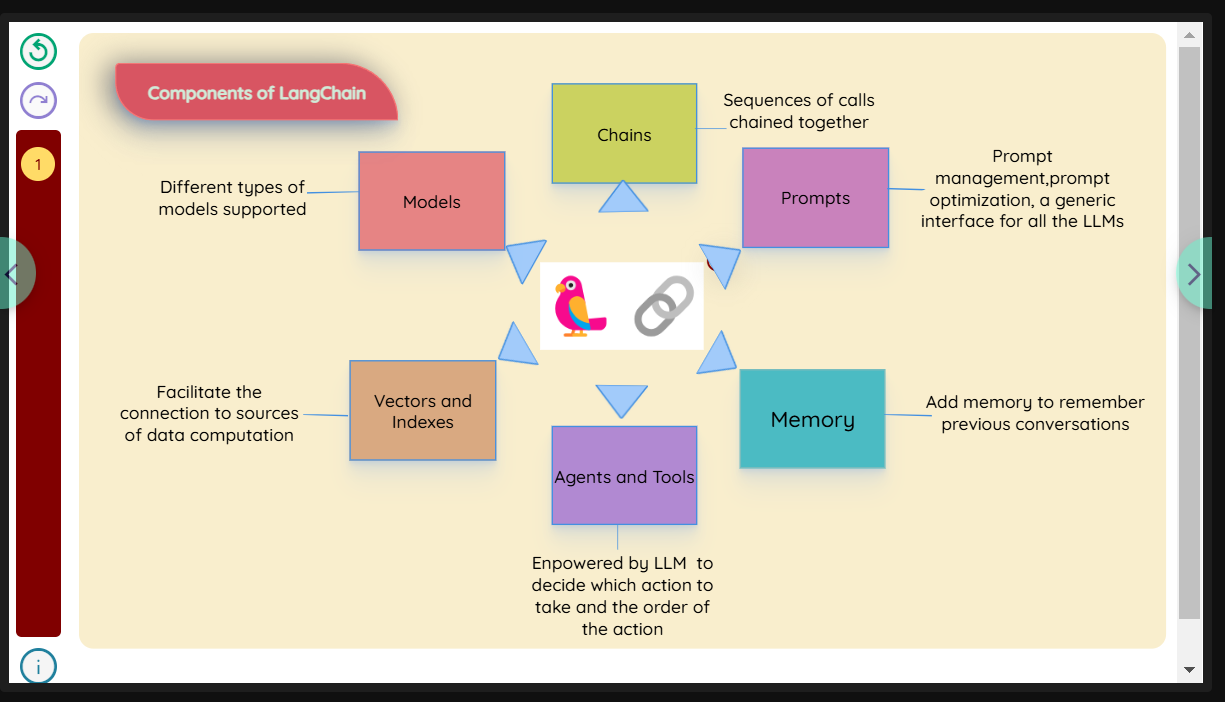

In [92]:
from IPython.display import display, Image

# Display an image with more control
display(Image(filename='langchain_components.png'))


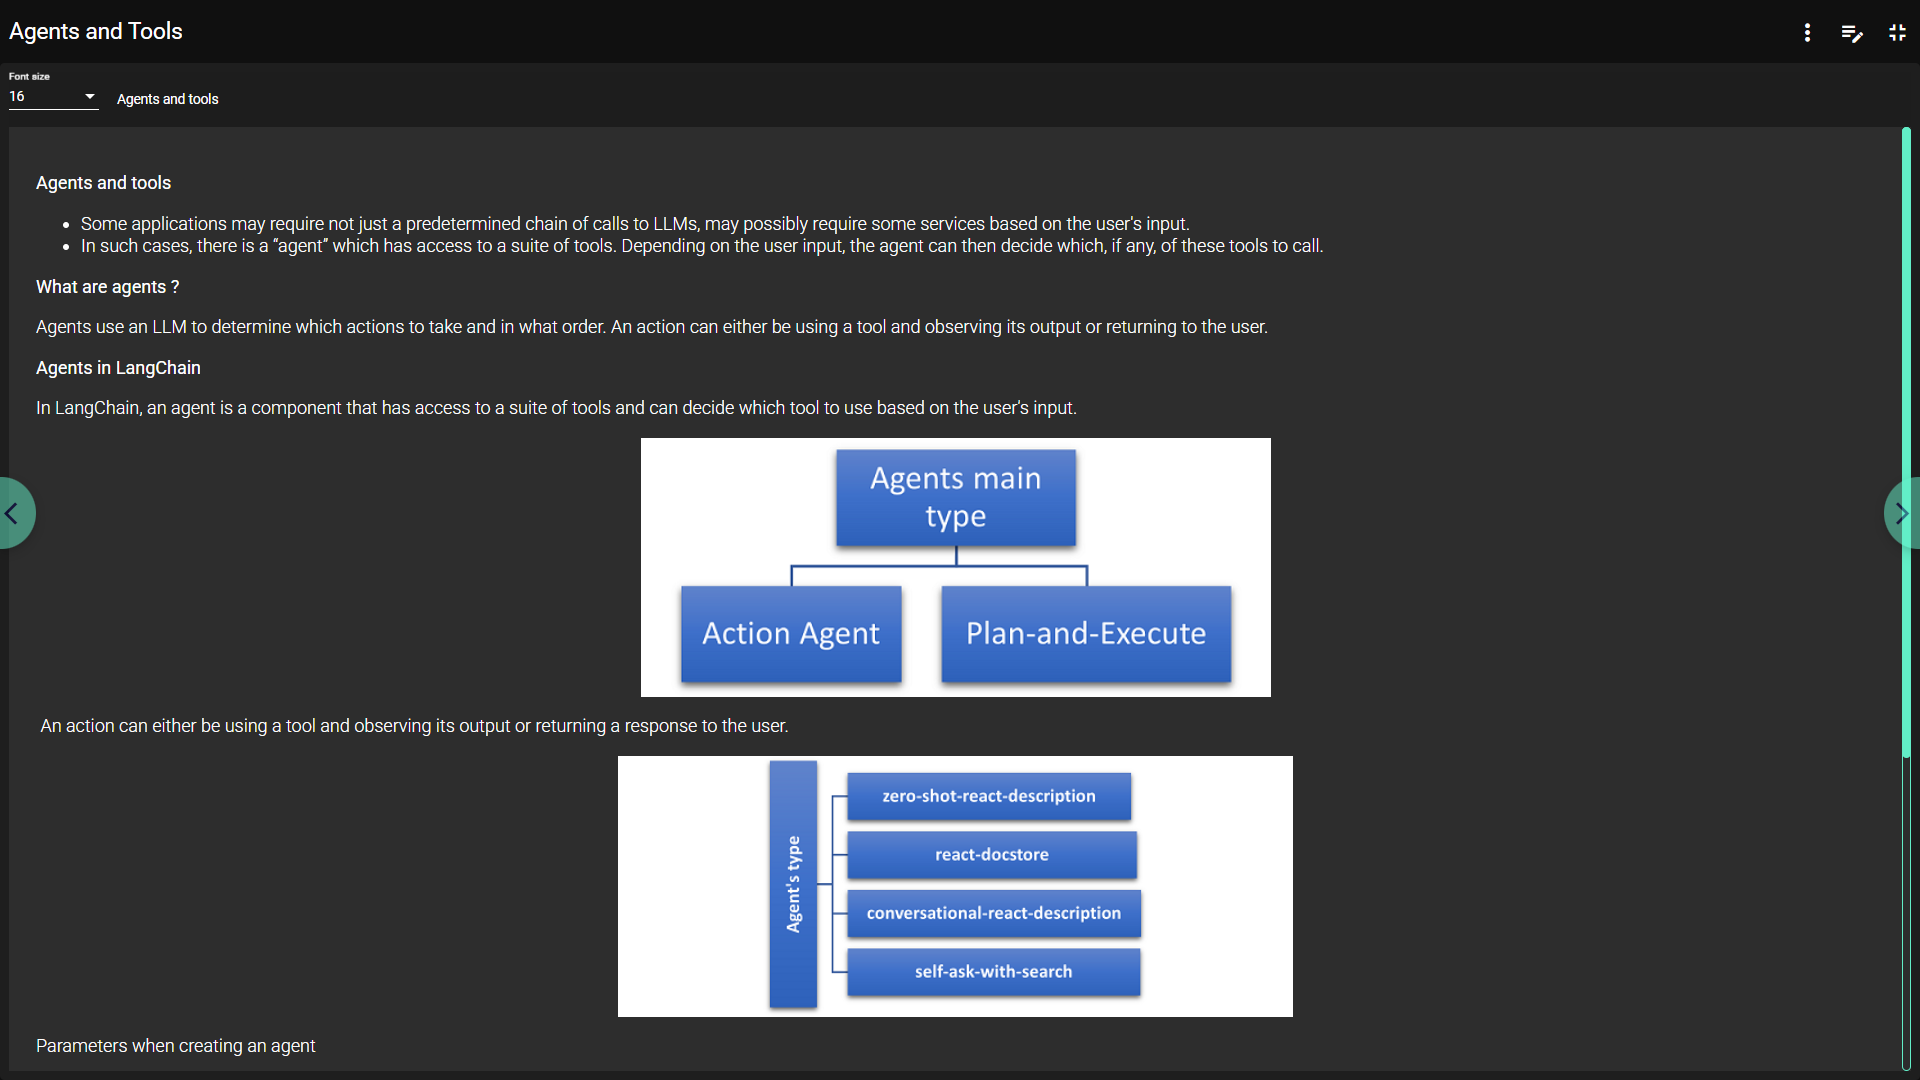

In [90]:
from IPython.display import display, Image

# Display an image with more control
display(Image(filename='agents_1.png'))


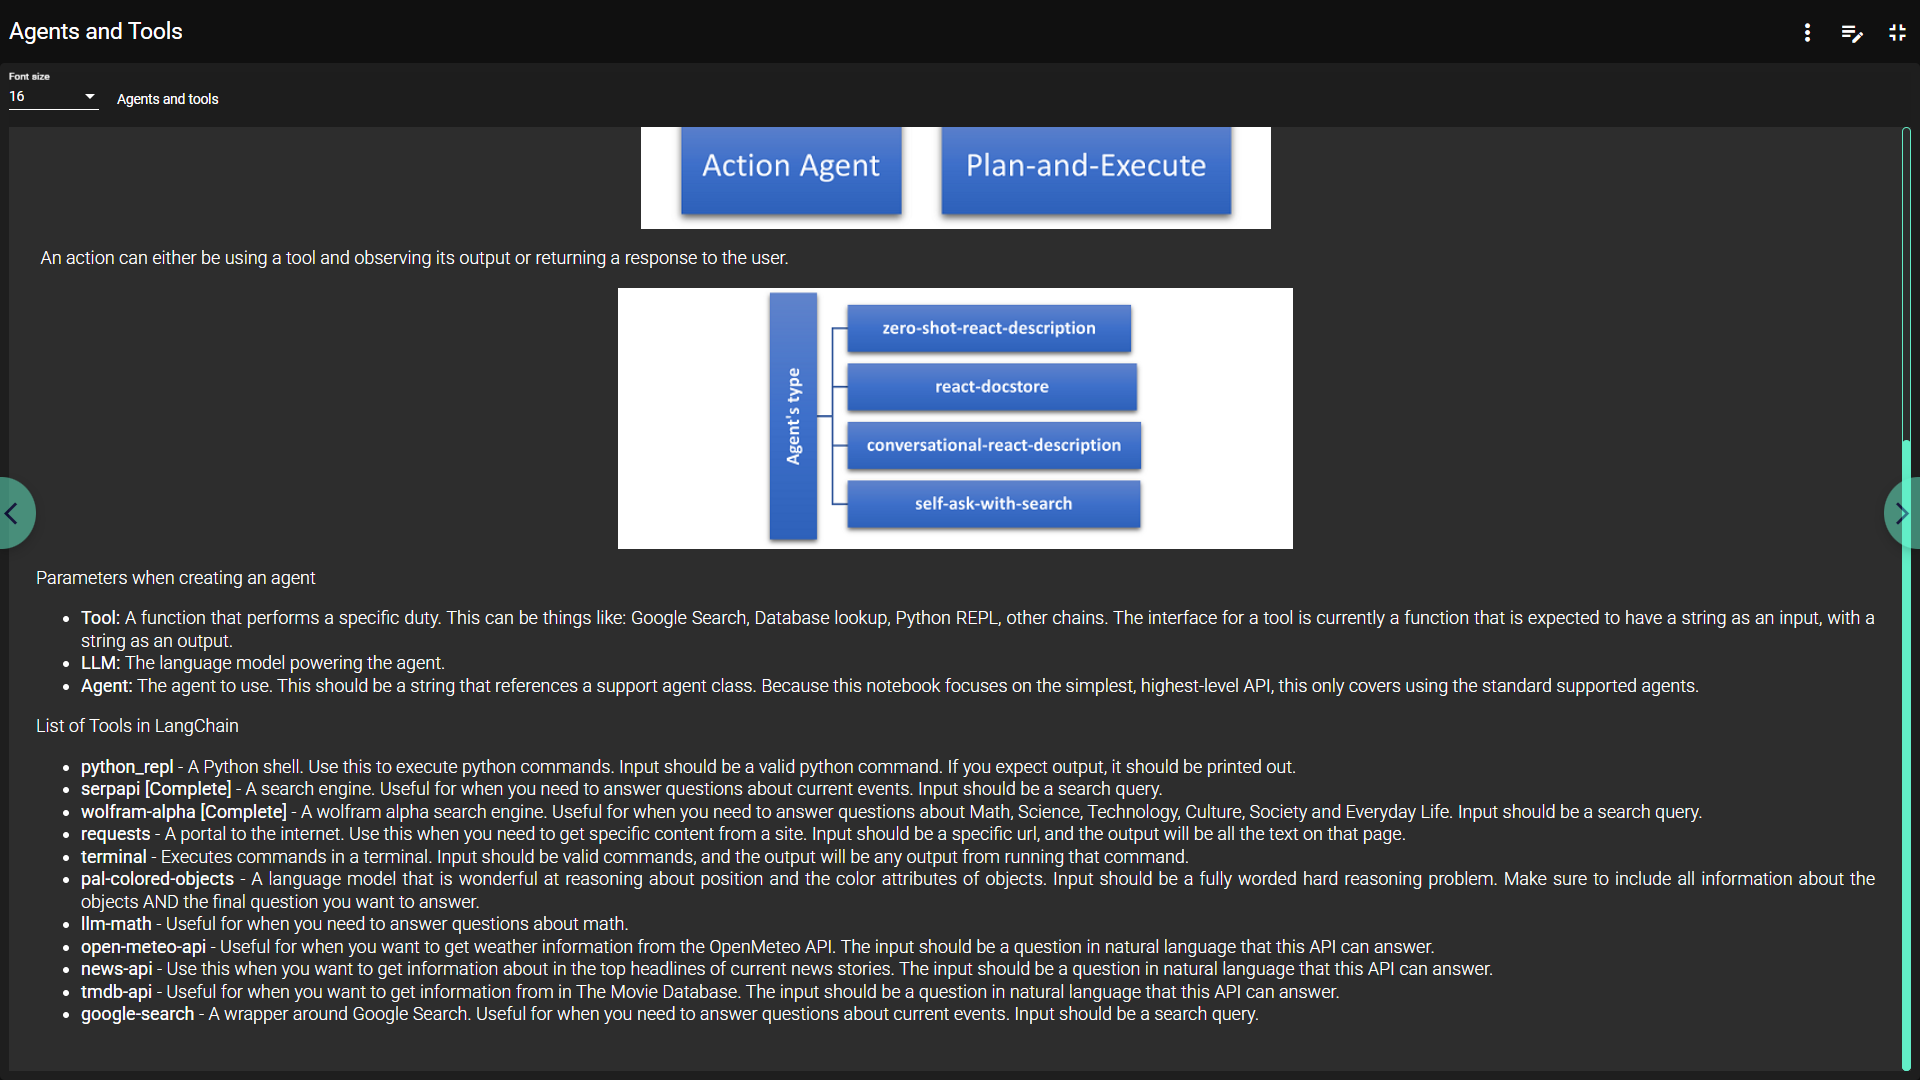

In [91]:
from IPython.display import display, Image

# Display an image with more control
display(Image(filename='agents_2.png'))


In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.llms import OpenAI

# Define a simple tool
def get_weather(city: str) -> str:
    return f"The weather in {city} is sunny and warm."

tools = [
    Tool(name="Weather Info", func=get_weather, description="Provides the weather information of a city")
]

llm = OpenAI(temperature=0)
agent = initialize_agent(tools, llm, agent_type="zero-shot-react-description")

# Test the agent
result = agent.run("What's the weather like in Paris?")
print(result)

C:\Users\Adari Shanmukh\AppData\Local\Temp\ipykernel_14900\2044509963.py:12: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0)
C:\Users\Adari Shanmukh\AppData\Local\Temp\ipykernel_14900\2044509963.py:13: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://p

The weather in Paris is sunny and warm.
